# Diabetes prediction 

To create this model we took the Diabetes dataset from [Kaggle](https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes) with the following variables:

- Id: Unique identifier for each data entry.
- Pregnancies: Number of times pregnant.
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.
- BloodPressure: Diastolic blood pressure (mm Hg).
- SkinThickness: Triceps skinfold thickness (mm).
- Insulin: 2-Hour serum insulin (mu U/ml).
- BMI: Body mass index (weight in kg / height in m^2).
- DiabetesPedigreeFunction: Diabetes pedigree function, a genetic score of diabetes.
- Age: Age in years.
- Outcome: Binary classification indicating the presence (1) or absence (0) of diabetes.

In [1]:
import pandas as pd
data = pd.read_csv('Healthcare-Diabetes.csv')
data.head()

Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
#Check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [3]:
# Check null values
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
data.describe()

Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
min       0.000000     0.000000                  0.078000    21.000000   
25%       0.000000    27.300000                  0.244000    24.000000   
50%      37.000000    32.200000                  0.375000    29.000000   
75%     130.000000    36.625000                  0.624000    40.000000   
max     846.000000    80.600000                  2.420000    81.000000   

           Outcome  
count  2768.000000  
mean      0.343931  
std       0.475104  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000

<AxesSubplot: xlabel='Outcome', ylabel='count'>

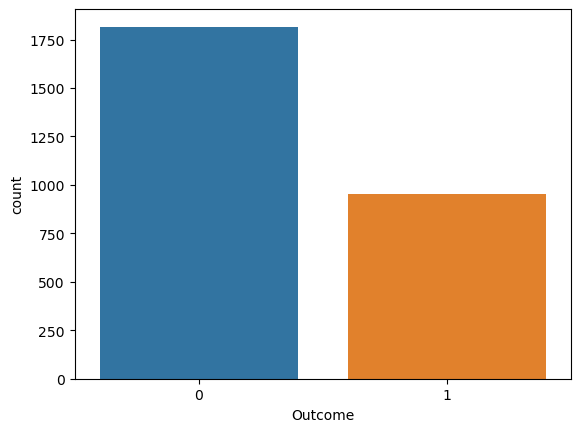

In [5]:
#check the distribution of the target variable 
import seaborn as sns
sns.countplot(x=data['Outcome'], label = "Diabetes")

We observe that the outcome variable is unbalanced, that is, that in the dataset there are more people without diabetes than with diabetes

# EDA and visualization

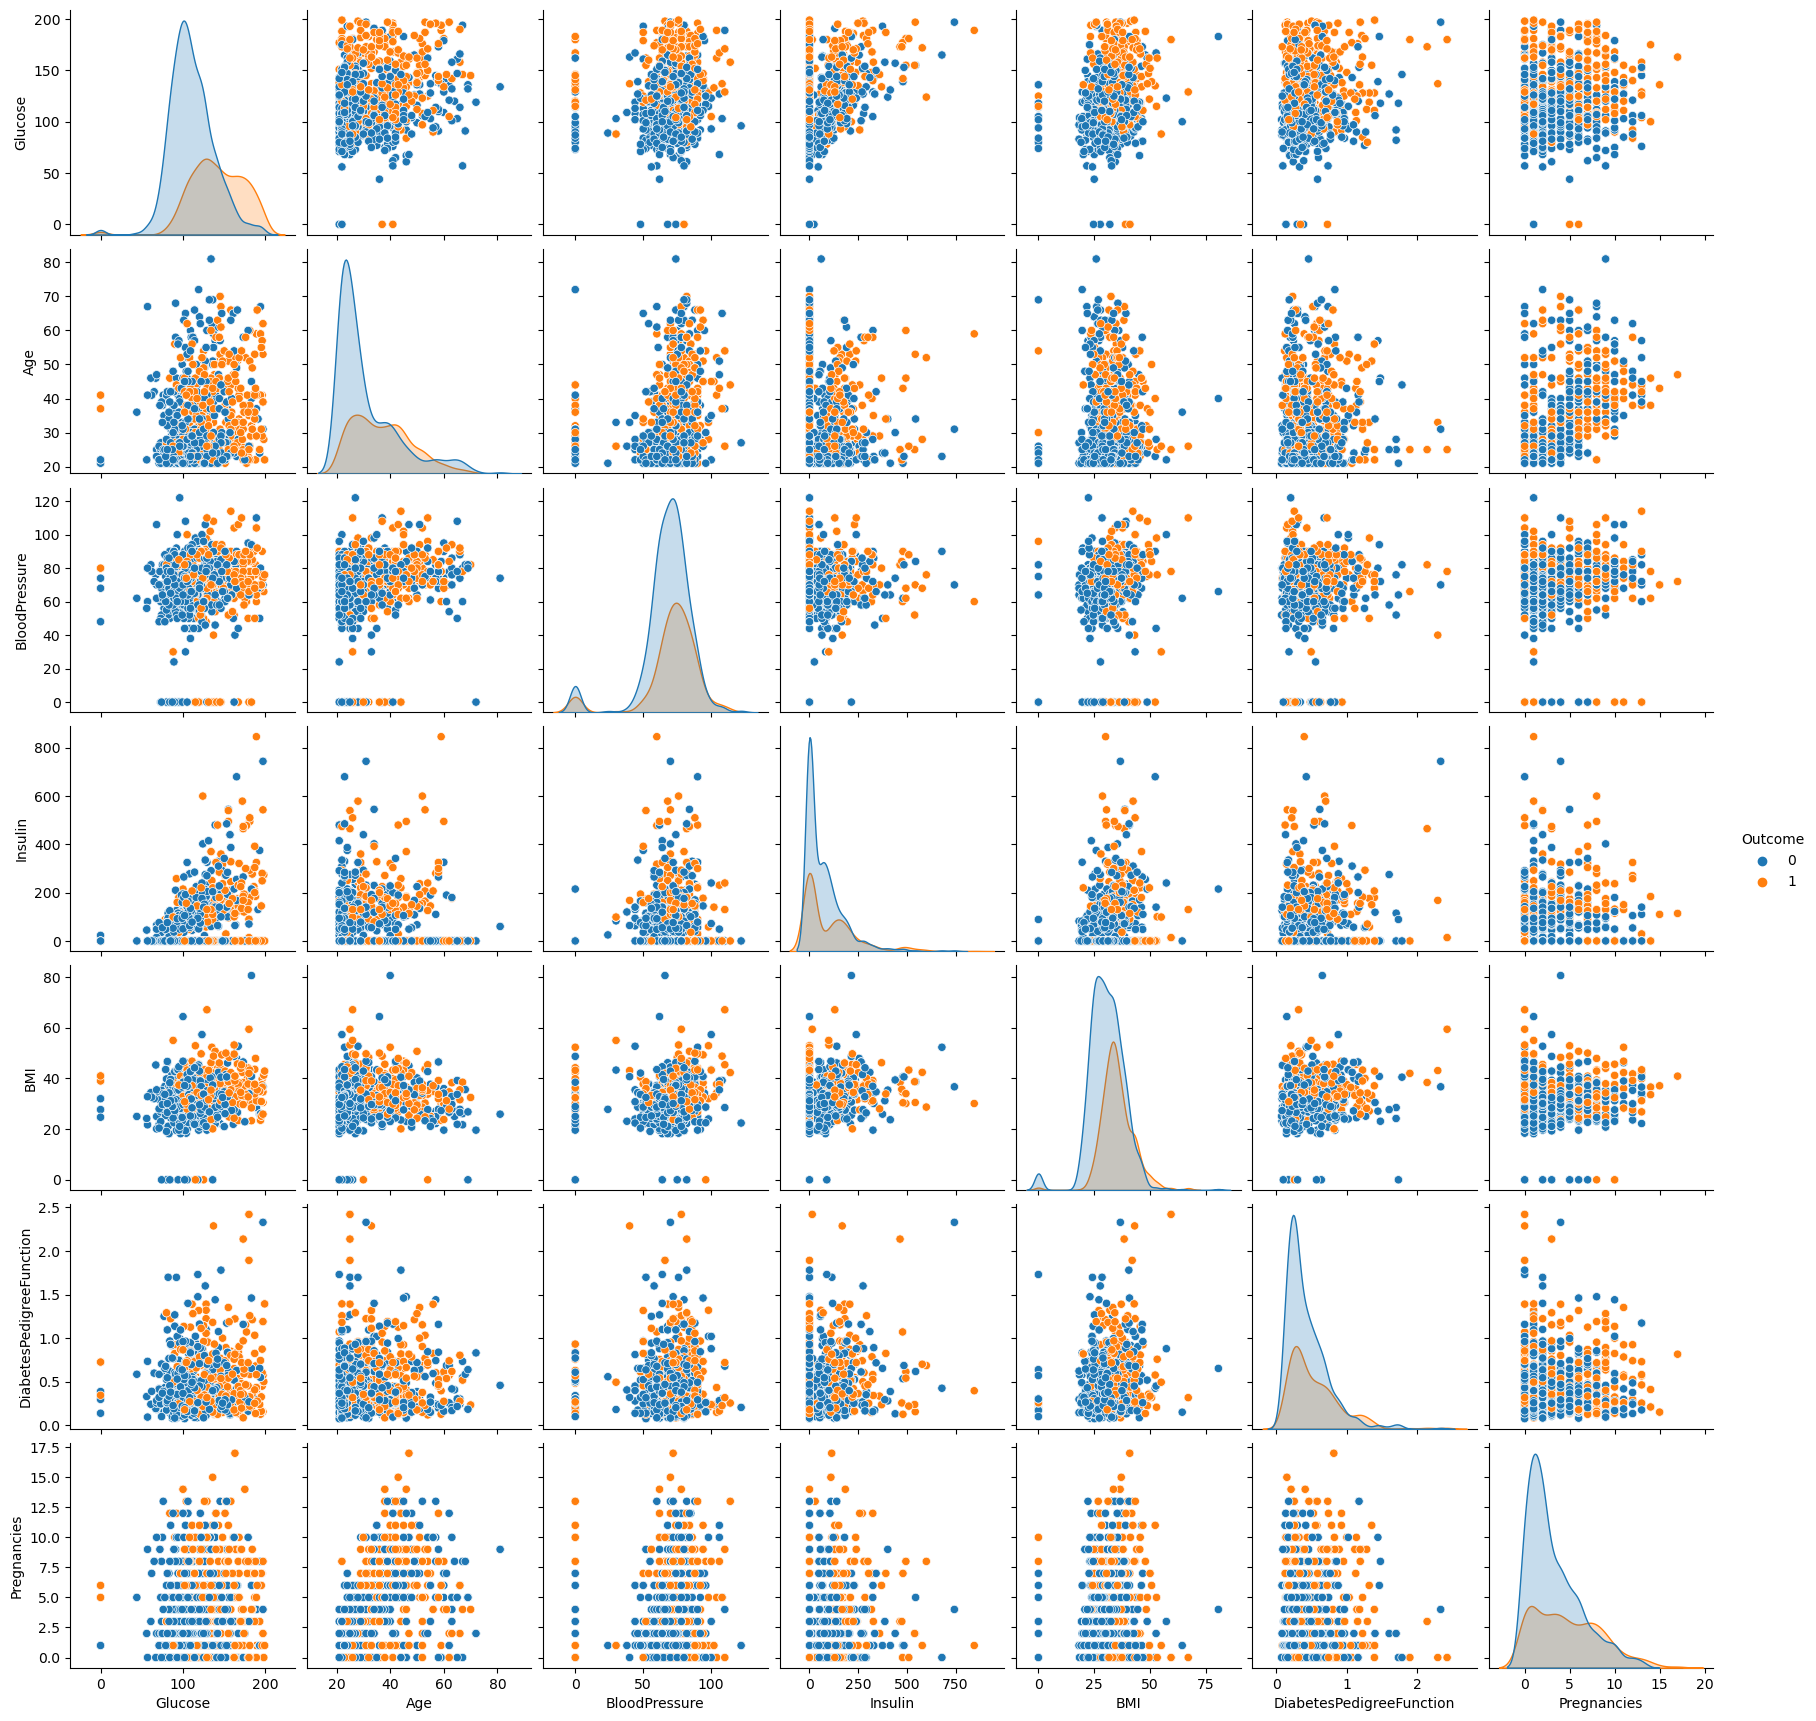

In [6]:
sns.pairplot(data, hue = 'Outcome' , vars = ['Glucose', 'Age','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Pregnancies'] )

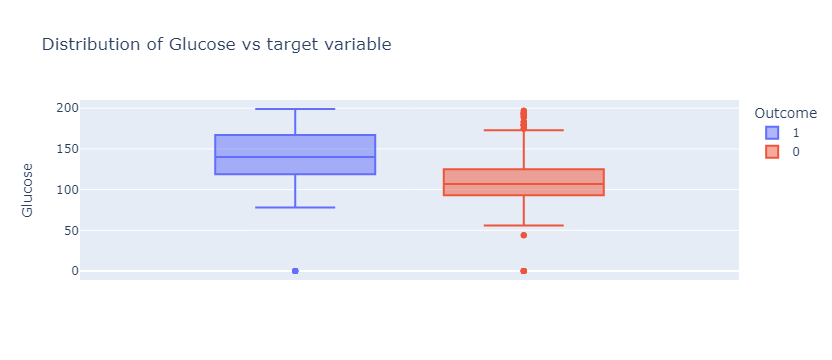

In [7]:
import plotly.express as px
fig = px.box(data, y="Glucose", color="Outcome",title = 'Distribution of Glucose vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

It is observed that the glucose variable seems to be of great importance for our model because it is evident that patients with diabetes have higher glucose levels compared to patients without diabetes.

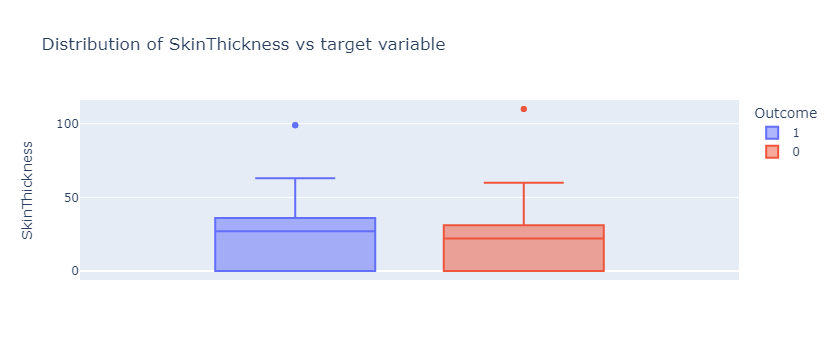

In [8]:
fig = px.box(data, y="SkinThickness", color="Outcome",title = 'Distribution of SkinThickness vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

This visual representation illustrates that, in terms of Triceps skinfold thickness, there isn't a substantial distinction between individuals with and without diabetes. Nevertheless, the average Triceps skinfold thickness tends to be slightly higher among patients with diabetes.

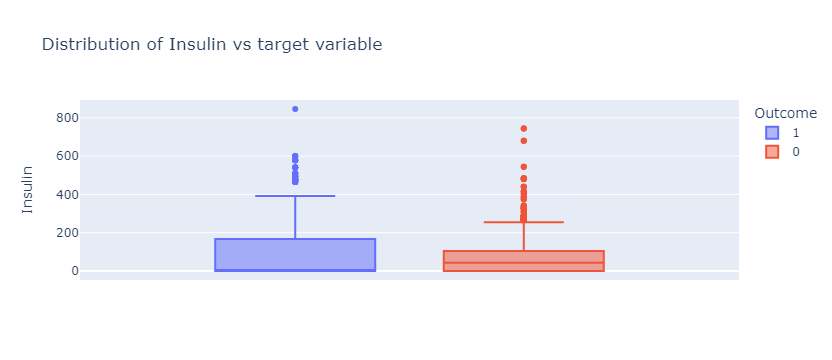

In [9]:
import plotly.express as px
fig = px.box(data, y="Insulin", color="Outcome",title = 'Distribution of Insulin vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

The box plot reveals a notable trend where patients with diabetes exhibit, on average, elevated insulin levels compared to individuals without diabetes. Despite this general pattern, it's noteworthy that there are outliers, particularly among non-diabetic individuals who surprisingly have high insulin levels. These outliers emphasize the variability within the non-diabetic group and suggest that some individuals, despite not having diabetes, may still have insulin levels that deviate from the typical range observed in the majority.

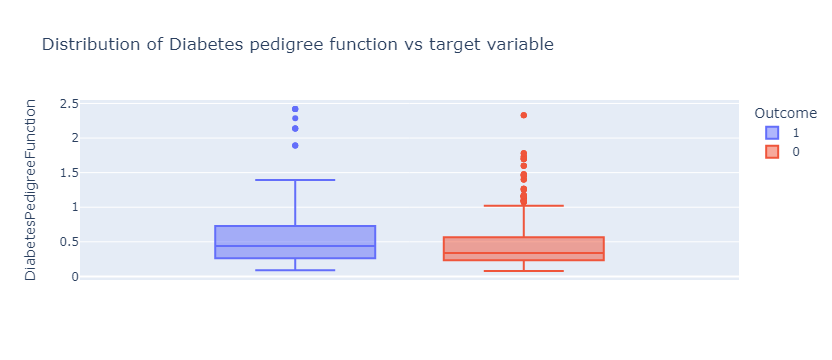

In [10]:
import plotly.express as px
fig = px.box(data, y="DiabetesPedigreeFunction", color="Outcome",title = 'Distribution of Diabetes pedigree function vs target variable')
fig.update_traces(quartilemethod="exclusive") 
fig.show()

This graph is of great importance because the variable analyzed `DiabetesPedigreeFunction` corresponds to a genetic score of diabetes, and shows that patients with diabetes present this variable at slightly higher levels than patients who do not have diabetes. .

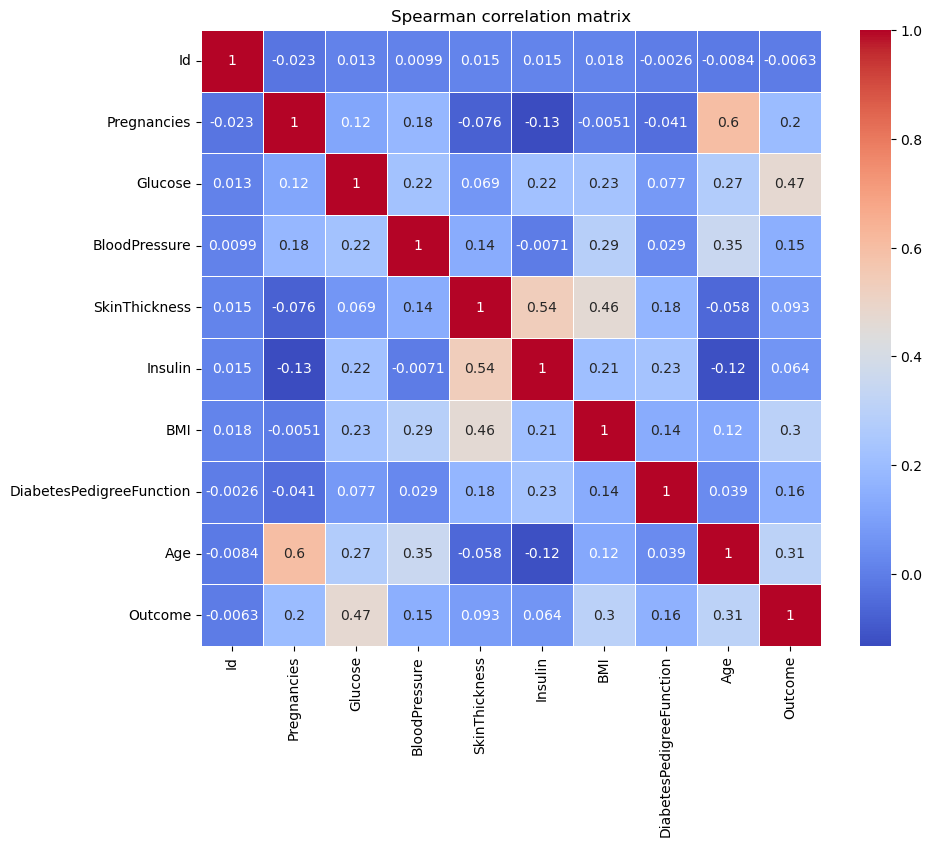

In [11]:
import pandas as pd
import scipy.stats
correlation_matrix = data.corr(method='spearman')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Spearman correlation matrix")
plt.show()

The correlation matrix shows us that, as we had mentioned before, the glucose variable has a high correlation with the output, the diagnosis of diabetes, that is, it is a variable of great importance for our model. Likewise, it is evident that among the independent variables, age and the number of pregnancies and insulin and Skin Thickness have a greater correlation.

# Data preprocessing

In [12]:
X = data.drop(['Id','Outcome'],axis=1)
y = data['Outcome']

In [13]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 173.1 KB


As we don't have object datatype, we only need to scale our data

## Applying SMOTE to balance data

In this case we will apply SMOTE to balance our dependent variable and prevent the model from being poorly trained. But we will only apply this to our train data.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2214, 8)

(554, 8)

(2214,)

(554,)

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE( random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<AxesSubplot: xlabel='Outcome', ylabel='count'>

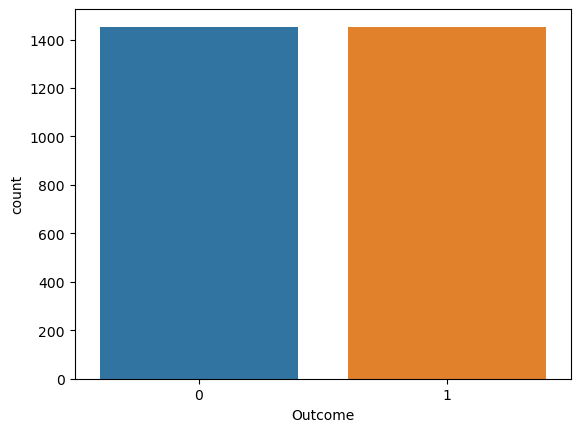

In [17]:
sns.countplot(x=y_train_resampled, label = "Diabetes")

## Scale the data

In [18]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler_diab = StandardScaler()
X_train_full = scaler_diab.fit_transform(X_train_resampled)
joblib.dump(scaler_diab,'scaler_diab.pkl')
X_train_full

array([[-1.17712209, -1.2767908 , -0.26729811, ...,  0.34212444,
         0.17225744, -1.12655422],
       [ 0.03654362,  1.00222079,  0.43366595, ..., -0.02155364,
         0.94863076, -0.25016108],
       [ 0.33996004,  1.95694186, -0.26729811, ..., -0.23474424,
         0.286607  , -0.42543971],
       ...,
       [-0.87370566,  0.01670227, -0.46757356, ..., -0.37269109,
        -0.41754555,  1.15206794],
       [-0.87370566,  0.04749972, -1.0683999 , ...,  0.83178391,
         0.49290403, -0.86363628],
       [-0.26687281, -1.39998061,  0.6339414 , ...,  0.14147446,
         2.42012903, -0.60071834]])

In [19]:
## scale also test data
X_test_full = scaler_diab.transform(X_test)
X_test_full

array([[ 3.37412431,  0.32467681,  0.03311506, ...,  0.50515254,
        -1.00734854,  0.80151068],
       [-1.17712209,  0.10909463,  0.53380367, ..., -0.23474424,
         0.64771087, -0.42543971],
       [ 0.64337647, -0.66084172,  0.2333905 , ..., -0.39777234,
         0.70488565,  0.62623205],
       ...,
       [-0.87370566, -1.6771577 , -0.36743584, ..., -1.41356283,
        -0.21592922, -0.68835765],
       [ 0.03654362, -0.07569009,  0.53380367, ..., -0.13441925,
        -0.13468085,  0.01275686],
       [ 0.03654362, -0.10648755, -0.06702267, ...,  0.24179945,
        -0.2821316 , -0.42543971]])

# Train the model

To predict diabetes we decided to use KNN algorith and although we used hyperparameter tuning, we decided to force the minimum number of k used for that search to be 3, which is why the range from 3 to 50 is created to determine the optimal number of neighbors, this will also help us avoid overfitting.

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':range(3, 51)}

In [21]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search.fit(X_train_full, y_train_resampled)
clf = grid_search.best_estimator_

In [22]:
grid_search.best_params_

{'n_neighbors': 3}

In [23]:
grid_search.best_score_

0.9332463876123048

# Evaluate the model

First we will evaluate the performance of the model with the training data and then we will do it with the test data, this way we can compare both results and thus check if our model has overfitting.

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc, roc_auc_score
import plotly.graph_objects as go

In [25]:
#first evaluate on the train
proba_train = clf.predict_proba(X_train_full)
pred_train = clf.predict(X_train_full)

<AxesSubplot: >

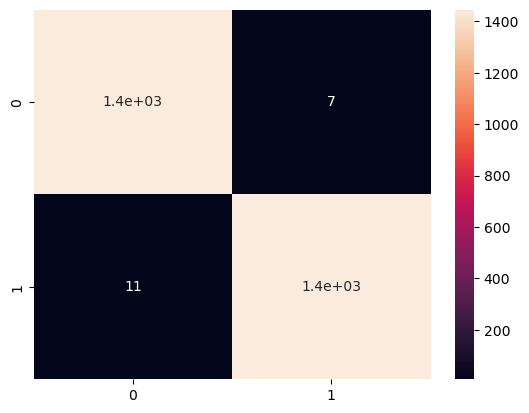

In [26]:
cm_train = confusion_matrix(y_train_resampled, pred_train)
sns.heatmap(cm_train, annot=True)

In [27]:
print(classification_report(y_train_resampled,pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1453
           1       1.00      0.99      0.99      1453

    accuracy                           0.99      2906
   macro avg       0.99      0.99      0.99      2906
weighted avg       0.99      0.99      0.99      2906



In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_train_prob = proba_train[:, 1]

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_train_prob)

auc = roc_auc_score(y_train_resampled, y_train_prob)
round(auc,3)

1.0

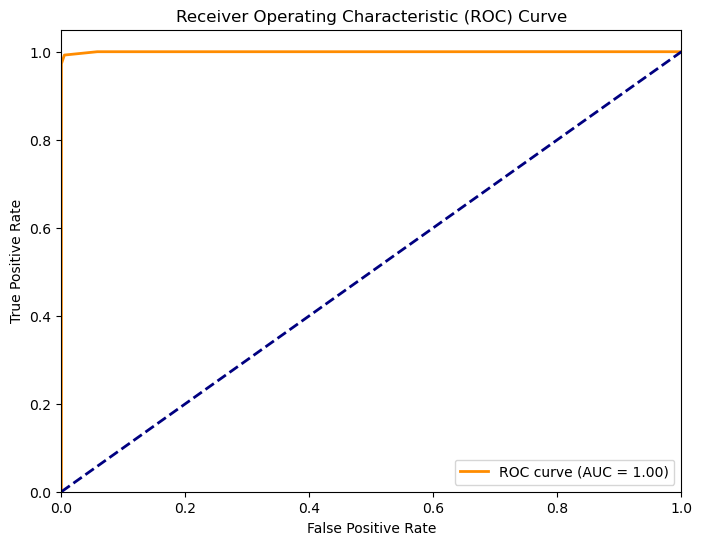

In [29]:
# curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<AxesSubplot: >

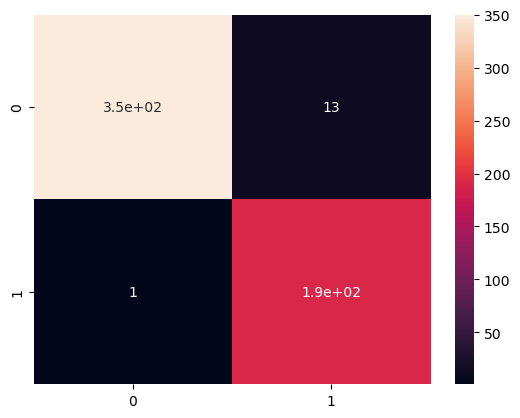

In [30]:
# Evaluate on the test
proba_test = clf.predict_proba(X_test_full)
pred_test = clf.predict(X_test_full)
cm_test = confusion_matrix(y_test, pred_test)
sns.heatmap(cm_test, annot=True)

In [31]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       363
           1       0.94      0.99      0.96       191

    accuracy                           0.97       554
   macro avg       0.97      0.98      0.97       554
weighted avg       0.98      0.97      0.97       554



In [32]:
# prediction probabilities for the positive class
y_test_prob = proba_test[:, 1]

# ROC curve
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# AUC 
auc_test = roc_auc_score(y_test, y_test_prob)
round(auc_test,3)

0.995

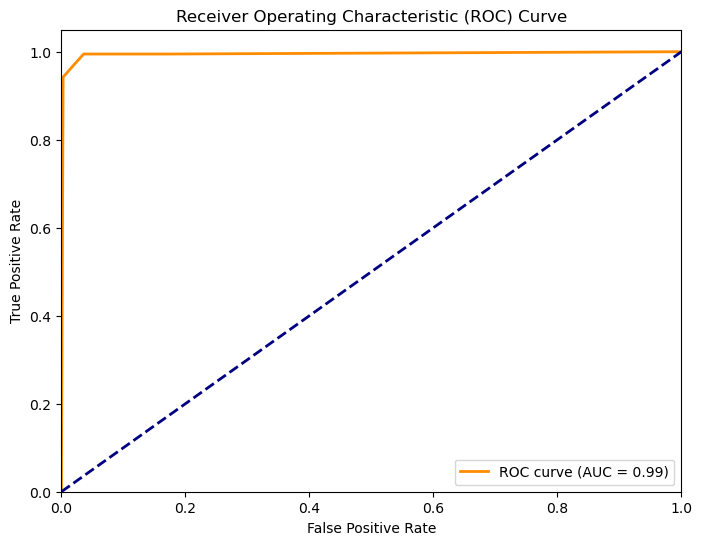

In [33]:
# curva ROC Test
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model

In [34]:
import pickle
with open ("diabetes_model.pkl", "wb") as d:
    pickle.dump(clf, d)
